In [4]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import os 
os.chdir("C:\Siddhartha\Personal Documents\BOK\AIML\Decision Tree")

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [10]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#pima_df = pd.read_csv(url, names= colnames)
#pima_df.head(2)

In [11]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes .csv", names= colnames)

In [12]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [13]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
pima_df = pima_df.fillna(pima_df.median())

In [14]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


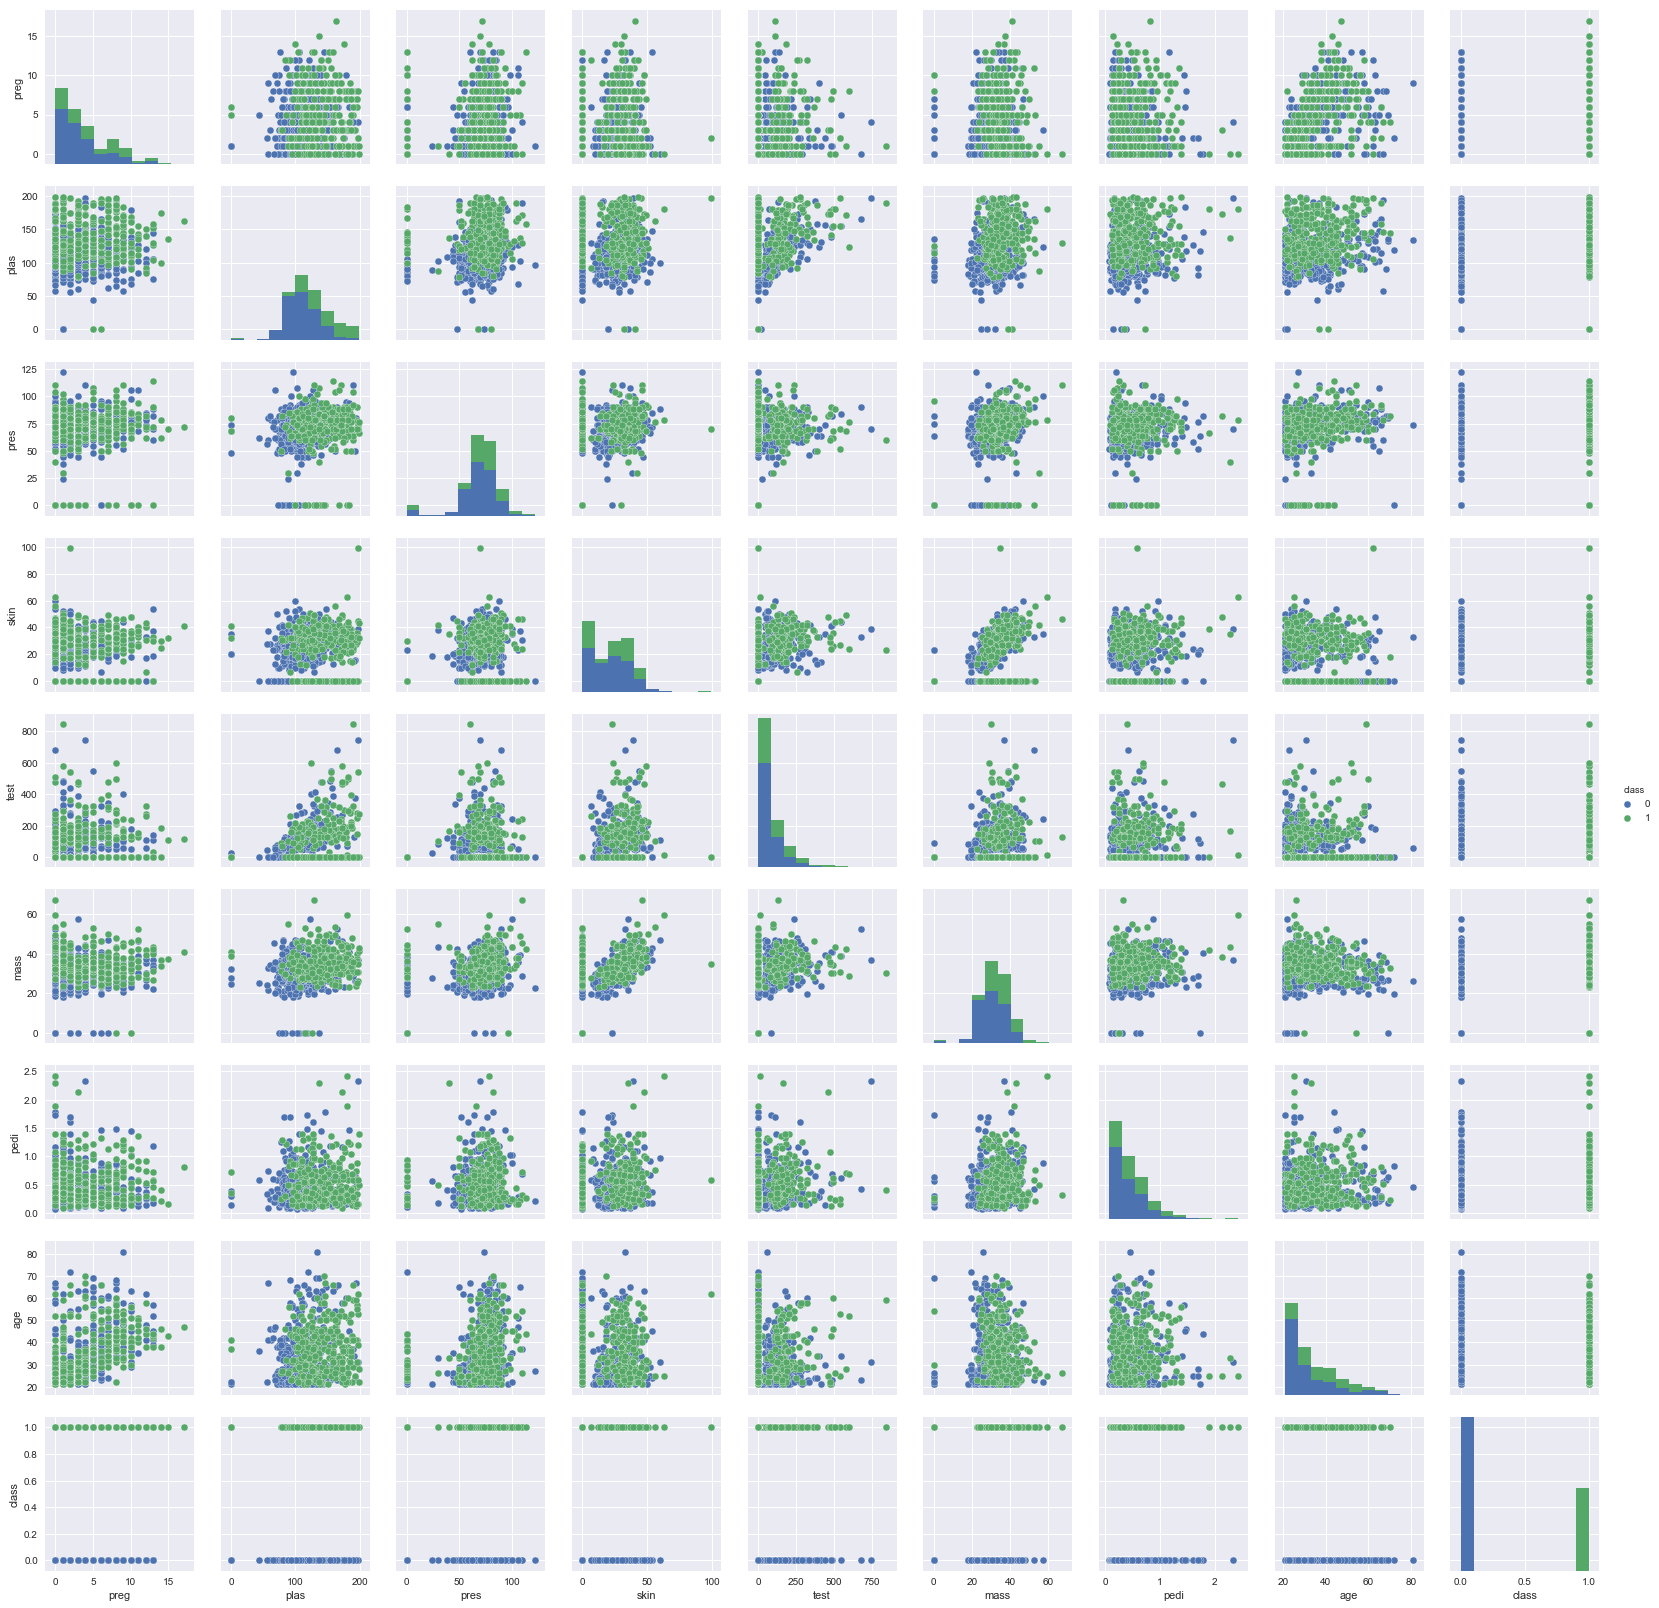

In [9]:
# Pairplot using sns

sns.pairplot(pima_df, hue = "class")

In [10]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [15]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )





In [23]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [18]:
dt_model.score(X_test , y_test)

0.7012987012987013

In [20]:
print(dt_model.score(X_train , y_train))

1.0


In [24]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng D:\pima_tree.dot -o D:/pima_tree.png")
Image("d:\pima_tree.png")

In [25]:
y_predict = dt_model.predict(X_test)

In [26]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

[[110  37]
 [ 32  52]]


In [170]:
# Improve the model (Regularizatin) -----------------------------Iteration 2 -----------------------------------------------

In [27]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
# Print regularized tree

Credit_Tree_File = open('pima_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

system("dot -Tpng D:\pima_tree_regularized.dot -o D:/pima_tree_regularized.png")
Image("d:\pima_tree_regularized.png")

In [29]:
dt_model.score(X_test , y_test)

0.7359307359307359

In [31]:
y_predict = dt_model.predict(X_test)

In [32]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

[[124  23]
 [ 38  46]]


In [33]:
# Improve the model (Random Forest) ----------------------- Iteration 3------------------------------

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 85)
rfcl = rfcl.fit(X_train, y_train)

In [35]:
dt_model.score(X_test , y_test)

0.7359307359307359

In [41]:
dt_model.score(X_train , y_train)

0.8175046554934823

In [36]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[126  21]
 [ 41  43]]


To save the model and reload it or transfer it over the wire, use pickle (not yet fully reliable though)

In [1]:
import pickle

In [2]:
with open('DT.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(dt_model, f, pickle.HIGHEST_PROTOCOL)

NameError: name 'dt_model' is not defined

The saved model can be re-loaded using following lines 

In [5]:
import pickle

with open('DT.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    dt_model = pickle.load(f)

In [16]:
dt_model.score(X_test , y_test) # This will give the same result as earlier.

0.7359307359307359

In [17]:
dt_model

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')